In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("dataset.csv",sep=';')
df.columns=["PriceHub","TradeDate","WtdAvgPrice","Change","DailyVolumeMWh","NumberTrades","NumberCounterparties"]
df.drop(df.index[0],inplace=True)
df

,PriceHub,TradeDate,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
1,ABC,1/8/2001,135.50,10.00,400,1,2
2,ABC,1/12/2001,175.00,39.50,800,1,2
3,ABC,1/19/2001,325.00,150.00,400,1,2
4,ABC,1/26/2001,245.00,-80.00,400,1,2
5,ABC,2/12/2001,212.50,-32.50,800,2,3
6,ABC,2/28/2001,268.00,55.50,400,1,2
7,ABC,3/1/2001,242.50,-25.50,1600,2,3
8,ABC,3/29/2001,154.00,-88.50,1600,2,4
9,ABC,4/19/2001,150.00,-4.00,800,1,2
10,ABC,4/30/2001,302.50,152.50,800,2,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 1 to 3894
Data columns (total 7 columns):
PriceHub                3894 non-null object
TradeDate               3894 non-null object
WtdAvgPrice             3894 non-null float64
Change                  3893 non-null float64
DailyVolumeMWh          3894 non-null int64
NumberTrades            3894 non-null int64
NumberCounterparties    3894 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 243.4+ KB


In [27]:
df['TradeDate']=pd.to_datetime(df['TradeDate'],infer_datetime_format=True)
df = df.set_index(['TradeDate'])
df

,PriceHub,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
TradeDate,,,,,,
2001-01-08,ABC,135.50,10.00,400,1,2
2001-01-12,ABC,175.00,39.50,800,1,2
2001-01-19,ABC,325.00,150.00,400,1,2
2001-01-26,ABC,245.00,-80.00,400,1,2
2001-02-12,ABC,212.50,-32.50,800,2,3
2001-02-28,ABC,268.00,55.50,400,1,2
2001-03-01,ABC,242.50,-25.50,1600,2,3
2001-03-29,ABC,154.00,-88.50,1600,2,4
2001-04-19,ABC,150.00,-4.00,800,1,2


In [28]:
df.drop("PriceHub",axis=1,inplace=True)
df

,WtdAvgPrice,Change,DailyVolumeMWh,NumberTrades,NumberCounterparties
TradeDate,,,,,
2001-01-08,135.50,10.00,400,1,2
2001-01-12,175.00,39.50,800,1,2
2001-01-19,325.00,150.00,400,1,2
2001-01-26,245.00,-80.00,400,1,2
2001-02-12,212.50,-32.50,800,2,3
2001-02-28,268.00,55.50,400,1,2
2001-03-01,242.50,-25.50,1600,2,3
2001-03-29,154.00,-88.50,1600,2,4
2001-04-19,150.00,-4.00,800,1,2


In [29]:
df.index

DatetimeIndex(['2001-01-08', '2001-01-12', '2001-01-19', '2001-01-26',
               '2001-02-12', '2001-02-28', '2001-03-01', '2001-03-29',
               '2001-04-19', '2001-04-30',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03'],
              dtype='datetime64[ns]', name='TradeDate', length=3894, freq=None)

In [30]:
def fun1(var):
    plt.figure(figsize  = (20,10))
    plt.plot(df[var])
    plt.xlabel("Date")
    plt.ylabel(var)

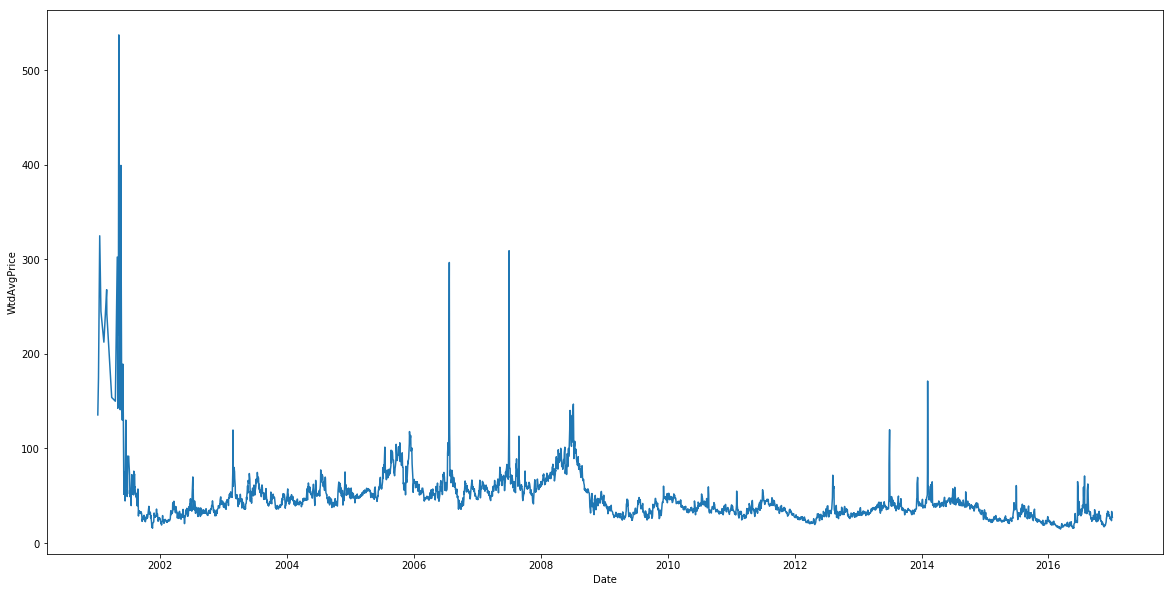

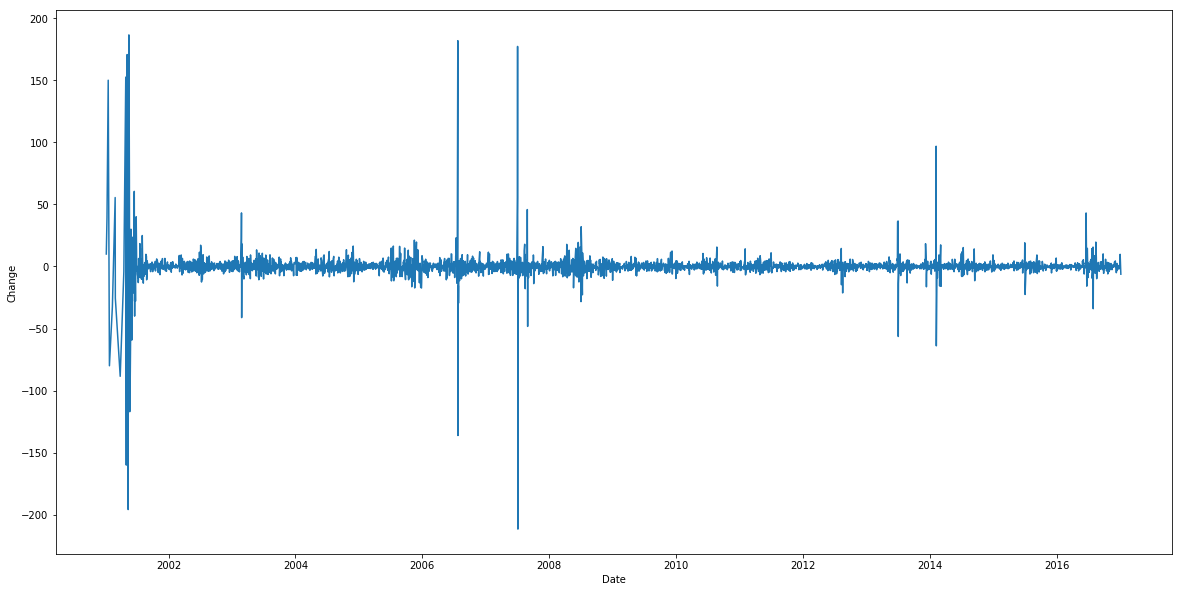

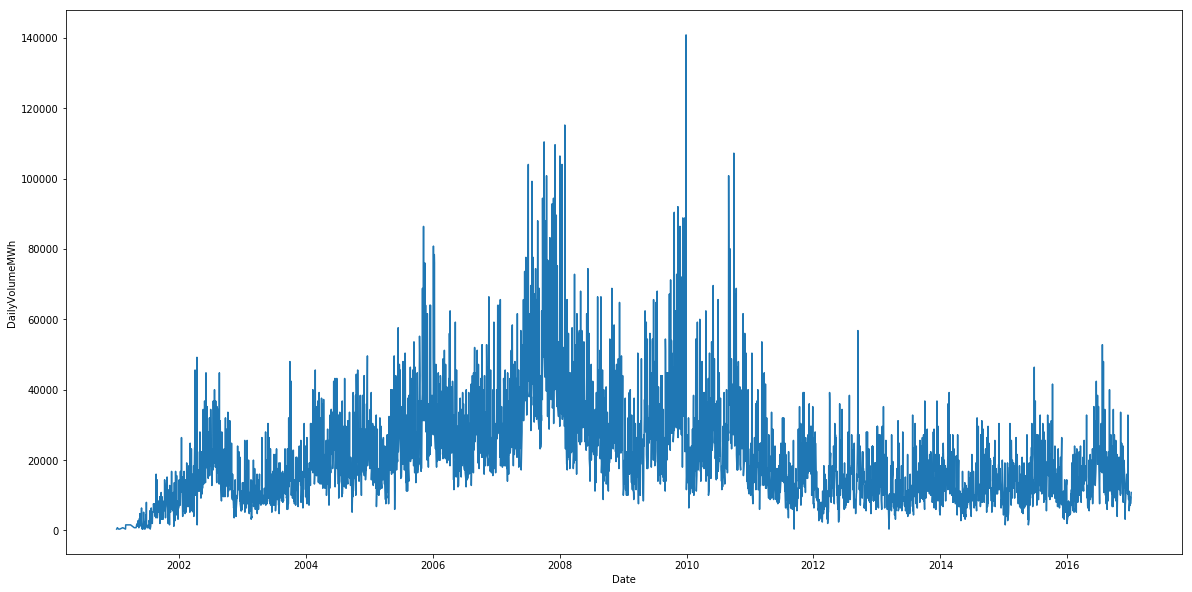

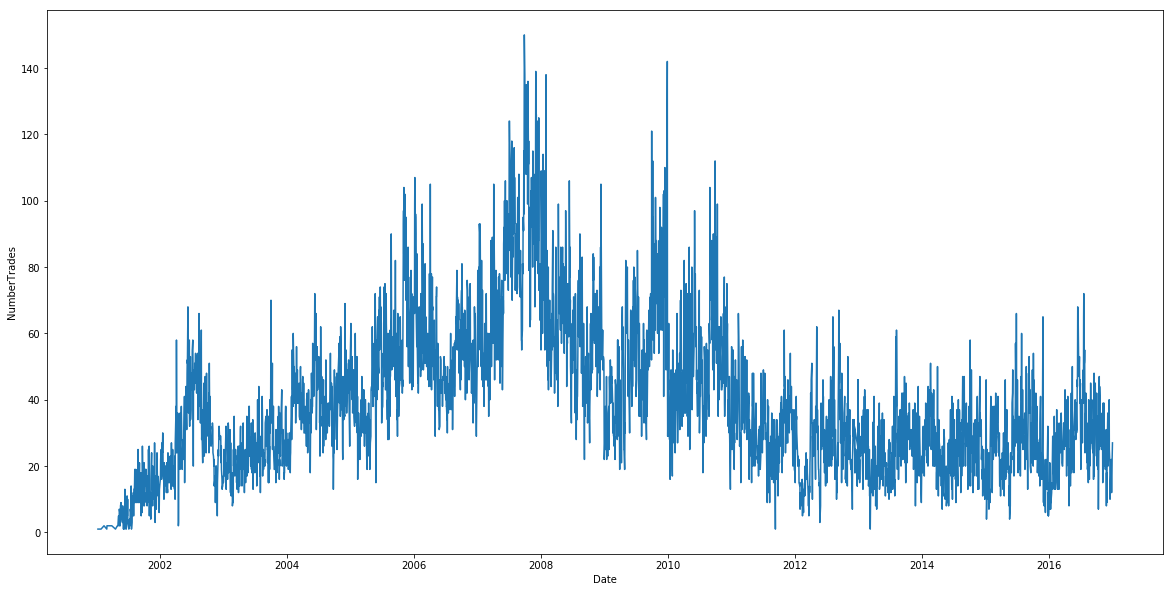

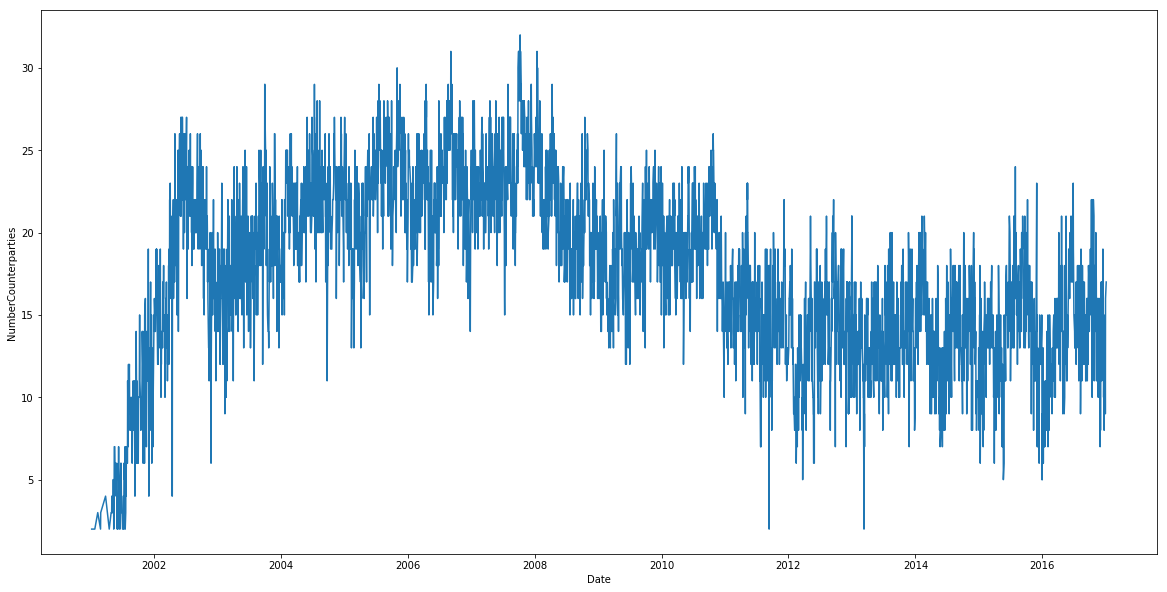

In [31]:
for x in df.columns:
    fun1(x)

In [32]:
df.isnull().sum()

WtdAvgPrice             0
Change                  1
DailyVolumeMWh          0
NumberTrades            0
NumberCounterparties    0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
def fun2(var):
    decomposition = seasonal_decompose(df[var],model='additive',freq=10)
    plt.figure(figsize = (20,10))
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.subplot(411)
    plt.plot(df[var], label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

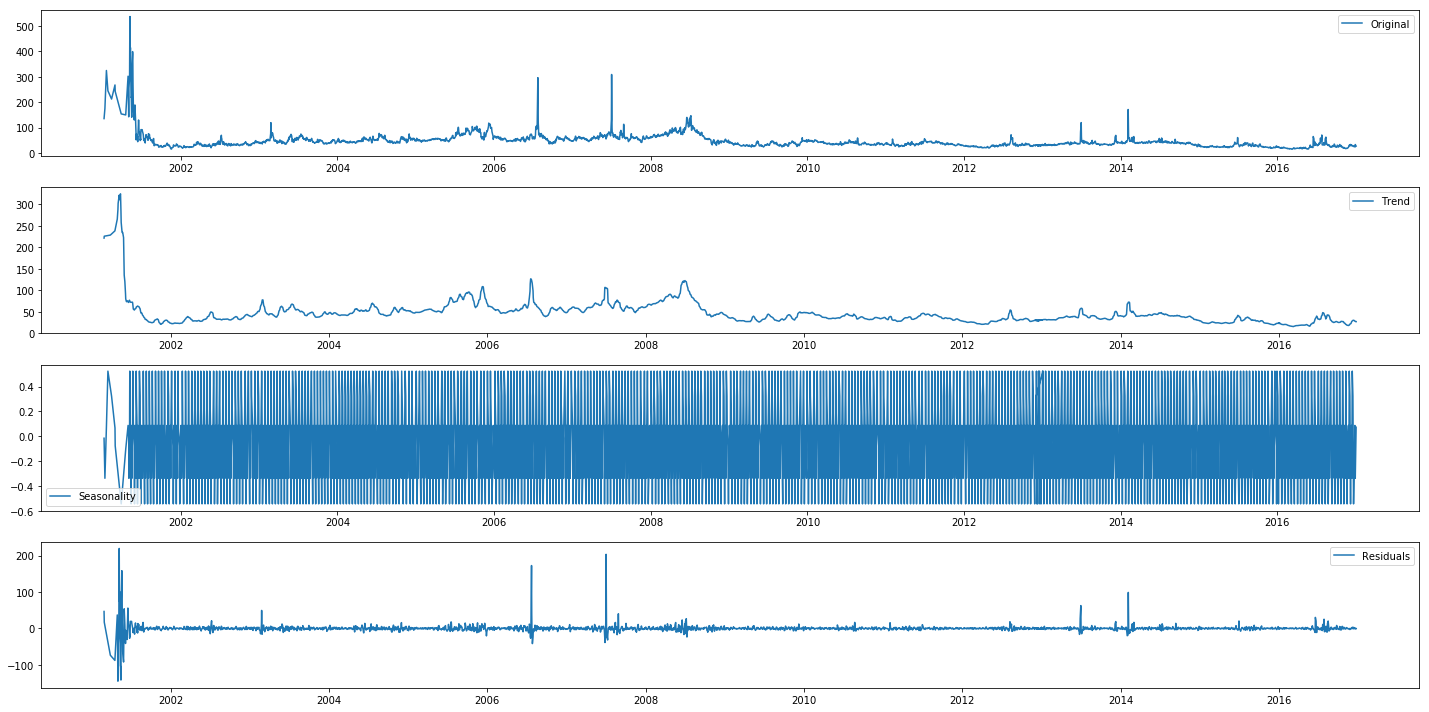

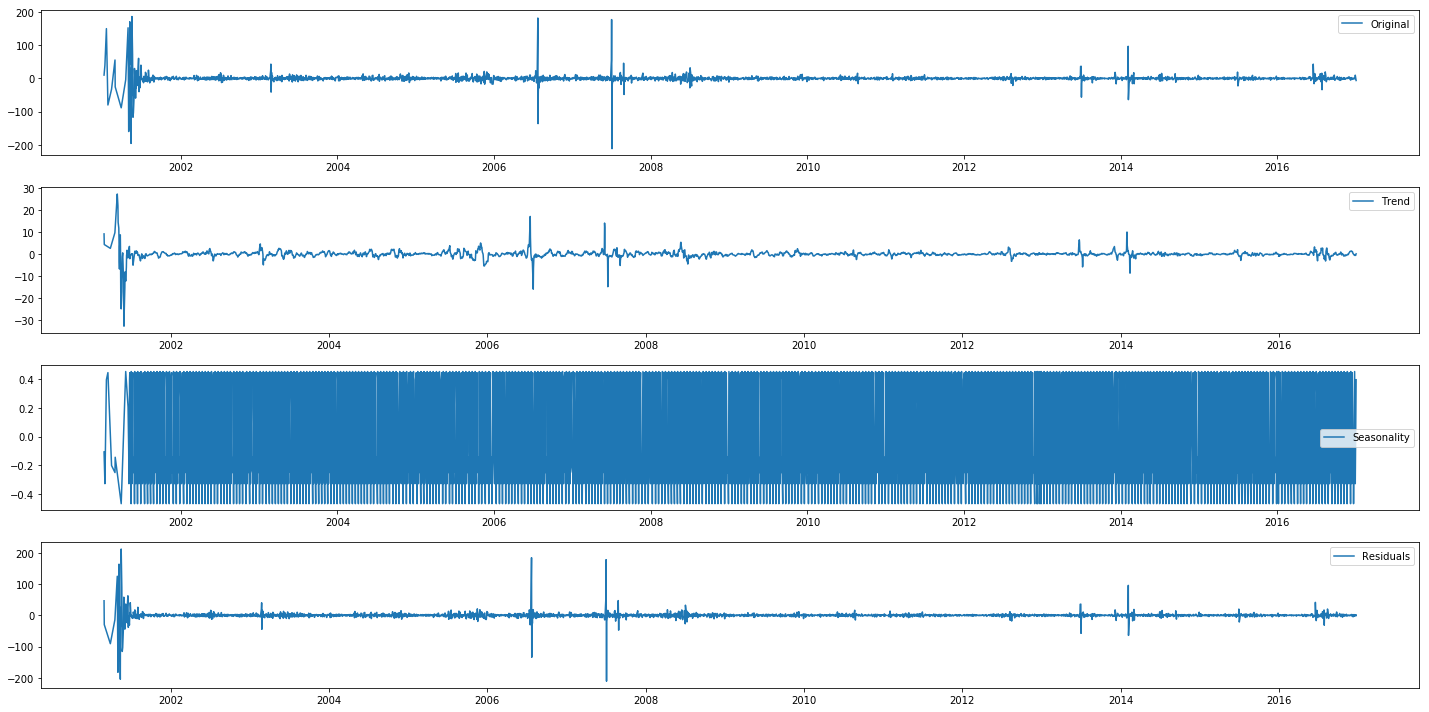

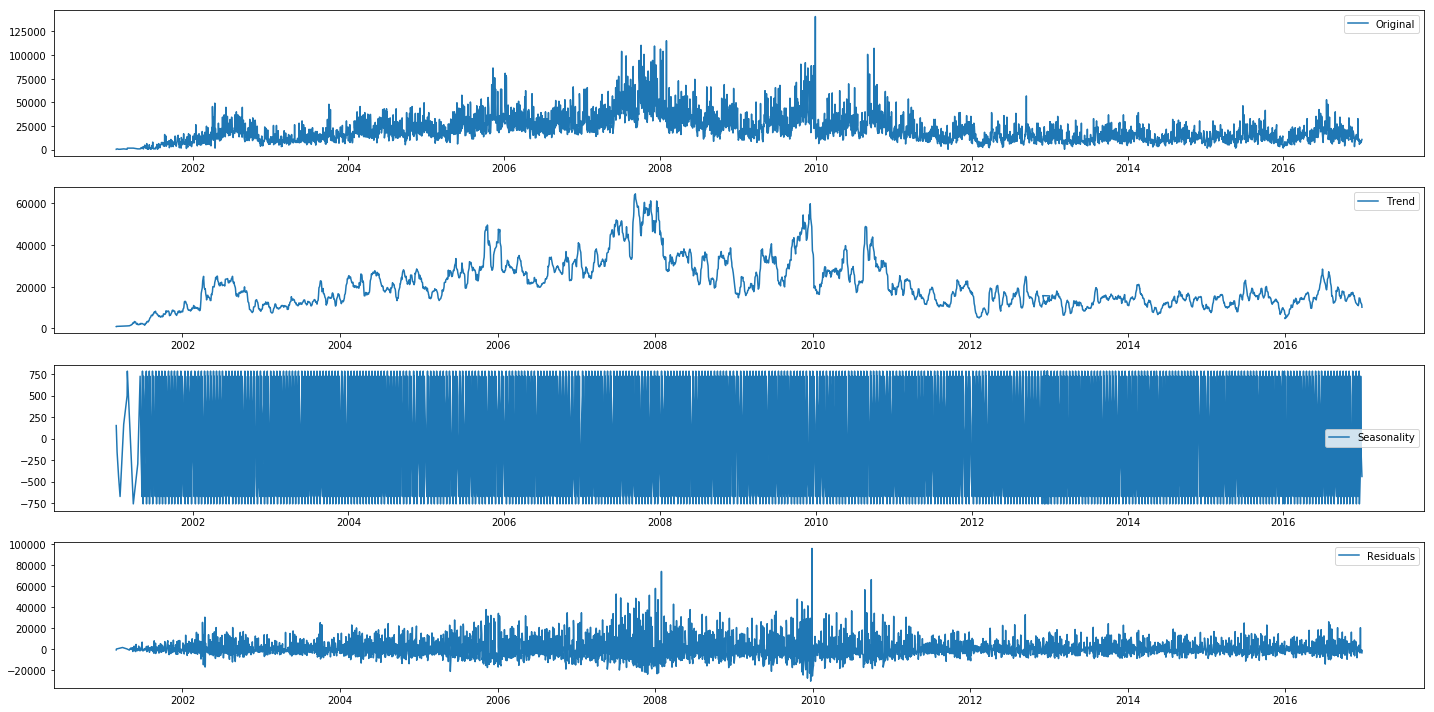

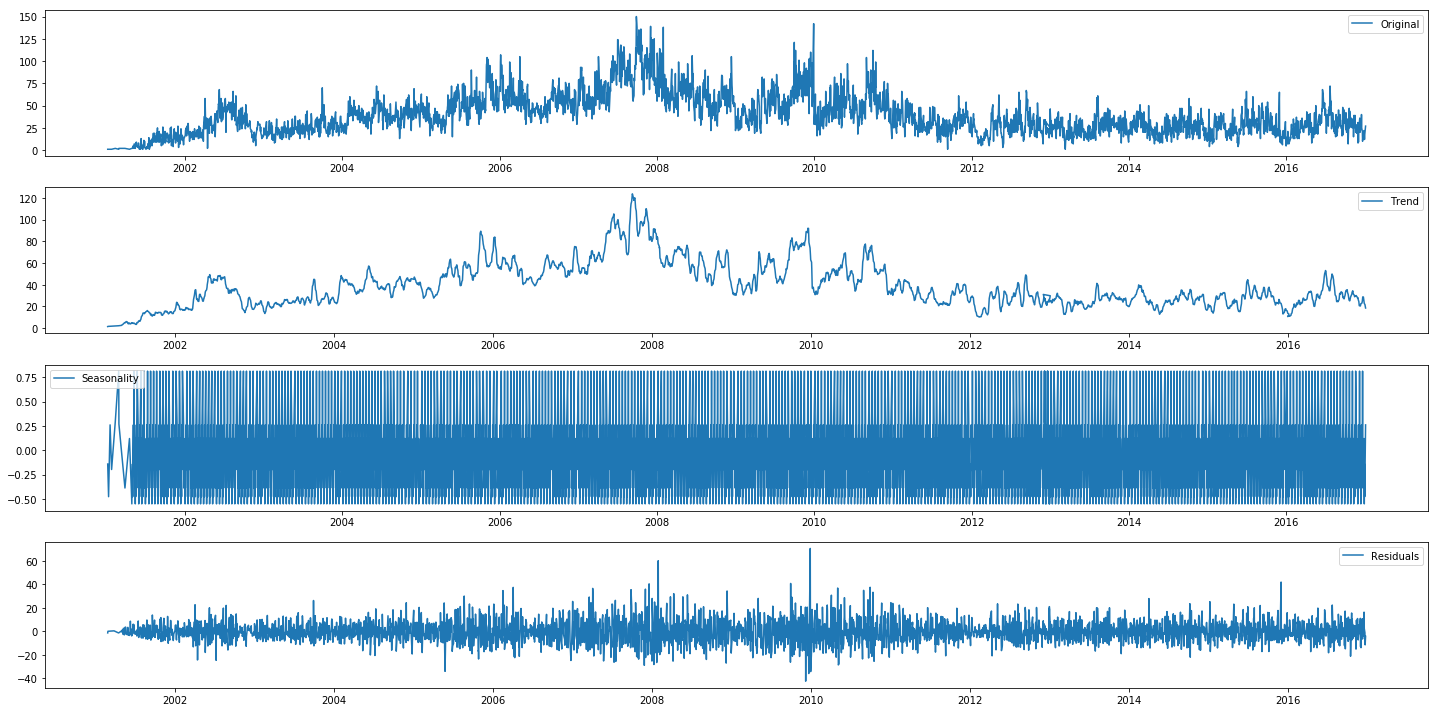

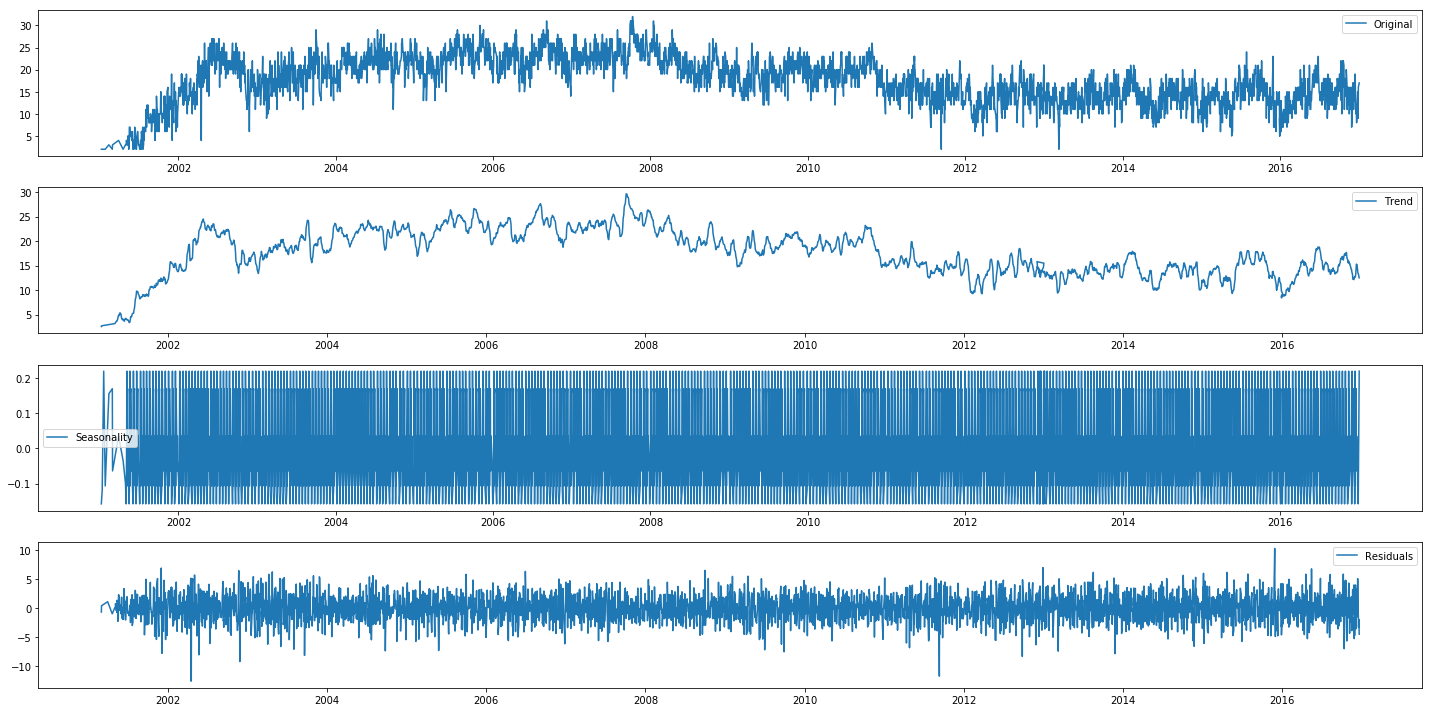

In [35]:
for x in df.columns:
    fun2(x)

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = df[timeseries].rolling(window = 7).mean()
    rolstd = df[timeseries].rolling(window = 7).std()

    plt.figure(figsize = (20,10))
    orig = plt.plot(df[timeseries], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[timeseries], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

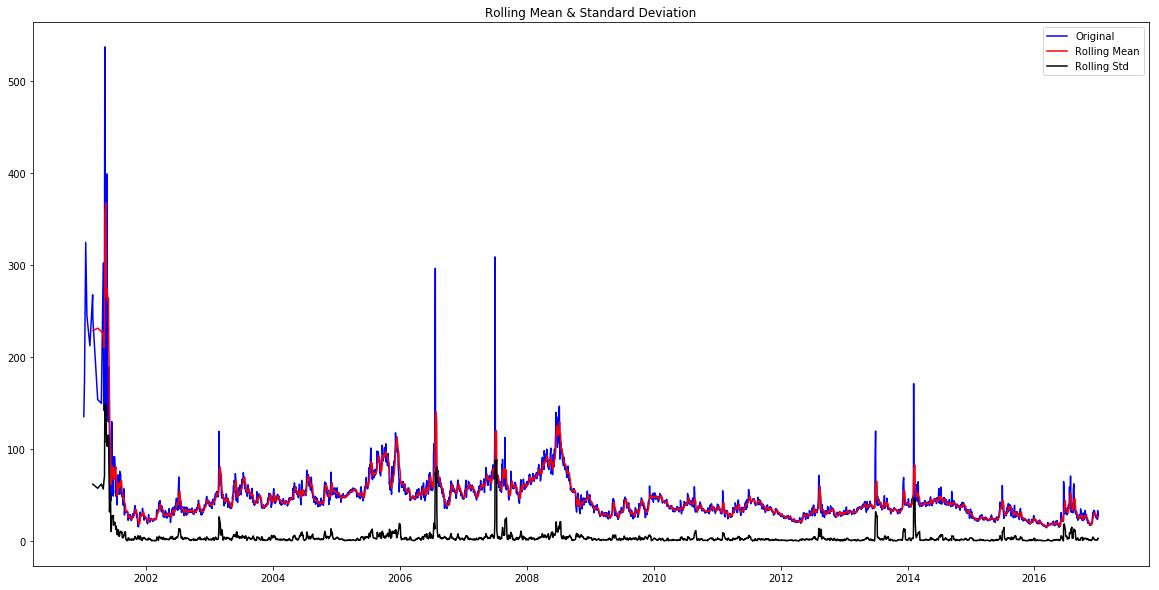

Results of Dickey-Fuller Test:
Test Statistic                -8.237017e+00
p-value                        5.852952e-13
#Lags Used                     2.900000e+01
Number of Observations Used    3.863000e+03
Critical Value (1%)           -3.432044e+00
Critical Value (5%)           -2.862288e+00
Critical Value (10%)          -2.567168e+00
dtype: float64


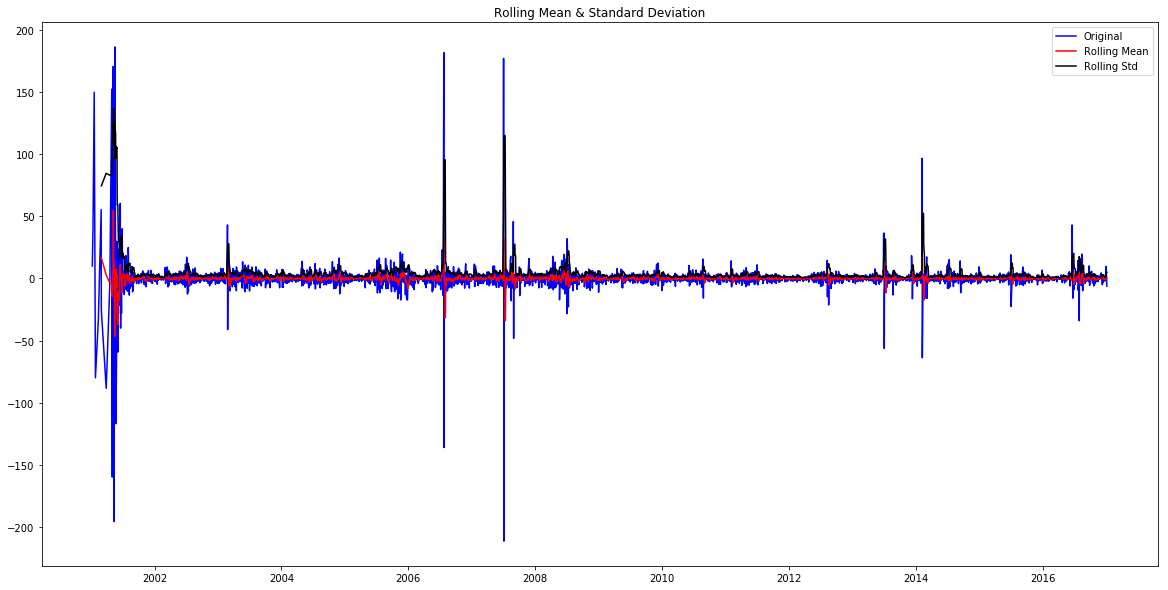

Results of Dickey-Fuller Test:
Test Statistic                -1.476451e+01
p-value                        2.374037e-27
#Lags Used                     2.800000e+01
Number of Observations Used    3.864000e+03
Critical Value (1%)           -3.432043e+00
Critical Value (5%)           -2.862288e+00
Critical Value (10%)          -2.567168e+00
dtype: float64


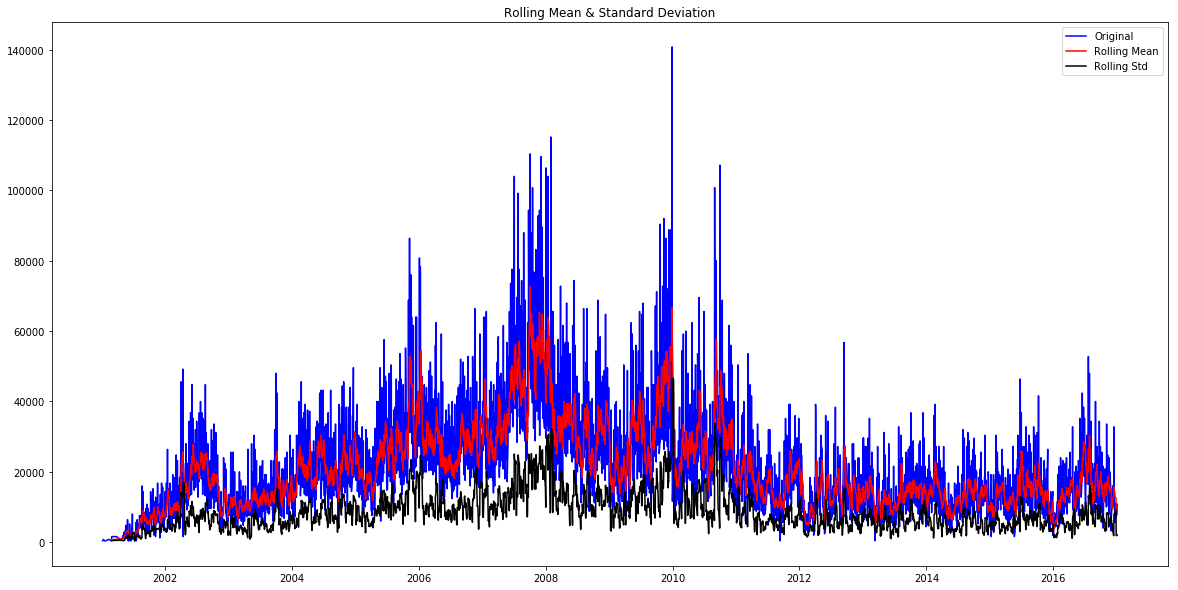

Results of Dickey-Fuller Test:
Test Statistic                   -3.576472
p-value                           0.006227
#Lags Used                       28.000000
Number of Observations Used    3864.000000
Critical Value (1%)              -3.432043
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


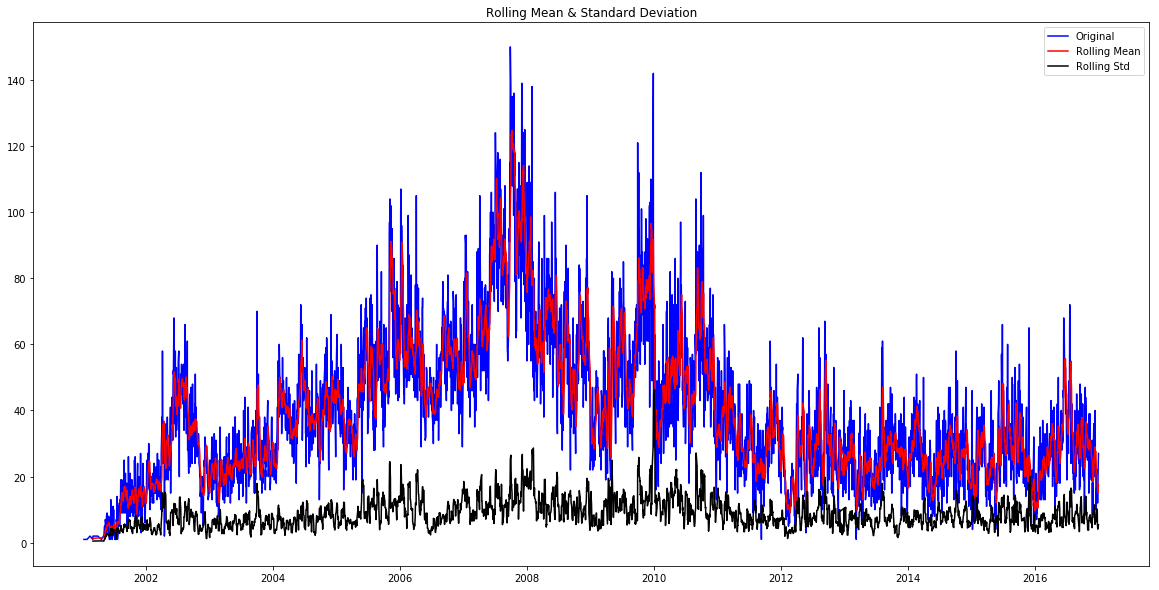

Results of Dickey-Fuller Test:
Test Statistic                   -3.456863
p-value                           0.009167
#Lags Used                       29.000000
Number of Observations Used    3863.000000
Critical Value (1%)              -3.432044
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


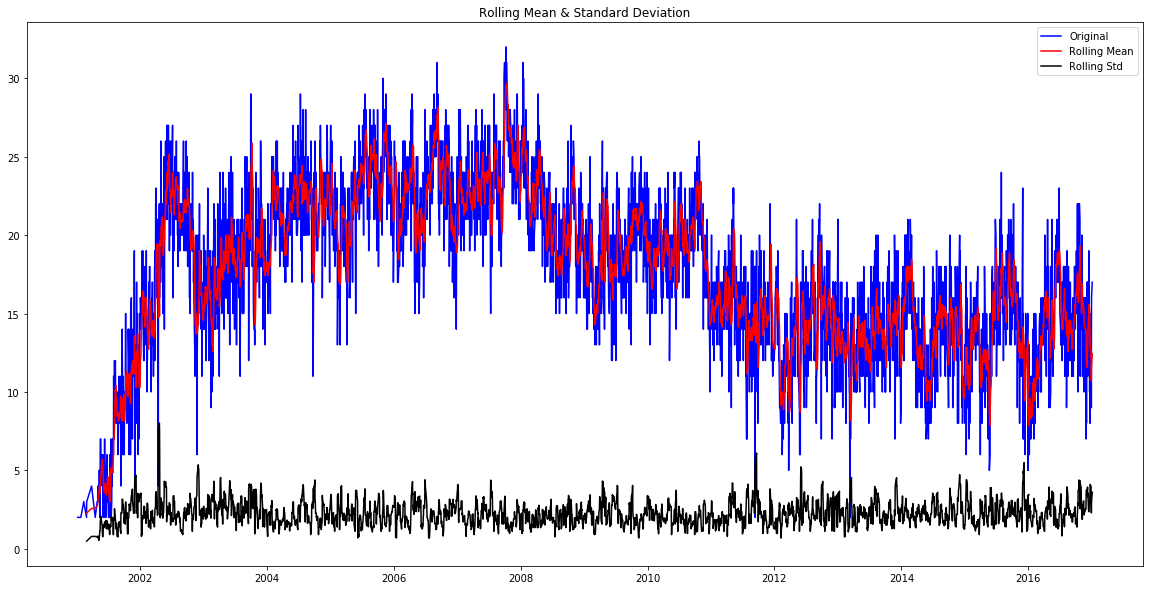

Results of Dickey-Fuller Test:
Test Statistic                   -3.513548
p-value                           0.007646
#Lags Used                       29.000000
Number of Observations Used    3863.000000
Critical Value (1%)              -3.432044
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


In [37]:
for x in df.columns:
    test_stationarity(x)

In [38]:
dataset = df["WtdAvgPrice"]
dataset = dataset.to_frame()
dataset

,WtdAvgPrice
TradeDate,
2001-01-08,135.50
2001-01-12,175.00
2001-01-19,325.00
2001-01-26,245.00
2001-02-12,212.50
2001-02-28,268.00
2001-03-01,242.50
2001-03-29,154.00
2001-04-19,150.00


            WtdAvgPrice
TradeDate              
2001-01-08       135.50
2001-01-12       175.00
2001-01-19       325.00
2001-01-26       245.00
2001-02-12       212.50
2001-02-28       268.00
2001-03-01       242.50
2001-03-29       154.00
2001-04-19       150.00
2001-04-30       302.50
2001-05-03       142.50
2001-05-04       255.00
2001-05-07       297.00
2001-05-08       467.67
2001-05-09       537.50
2001-05-10       385.00
2001-05-11       415.00
2001-05-14       219.17
2001-05-15       220.00
2001-05-16       167.50
2001-05-17       141.00
2001-05-18       327.50
2001-05-21       399.44
2001-05-22       389.50
2001-05-23       272.50
2001-05-25       170.00
2001-05-29       130.00
2001-05-30       160.00
2001-05-31       171.63
2001-06-01       189.29
...                 ...
2016-11-16        17.19
2016-11-17        17.15
2016-11-18        18.43
2016-11-21        19.10
2016-11-22        18.38
2016-11-23        18.34
2016-11-28        22.08
2016-11-29        24.75
2016-11-30      

C:\Users\Kaushal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kaushal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


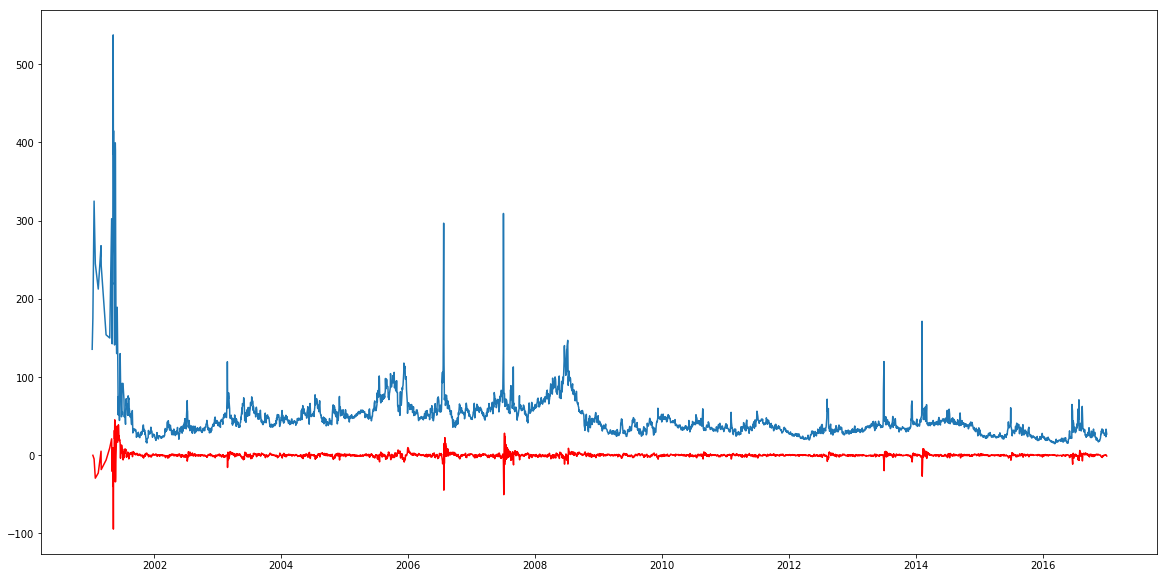

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(dataset)
decomposition = seasonal_decompose(dataset,freq=30) 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset, order=(2,1,2))
results = model.fit(disp=-1)
plt.figure(figsize =  (20,10))
plt.plot(dataset)
plt.plot(results.fittedvalues, color='red')

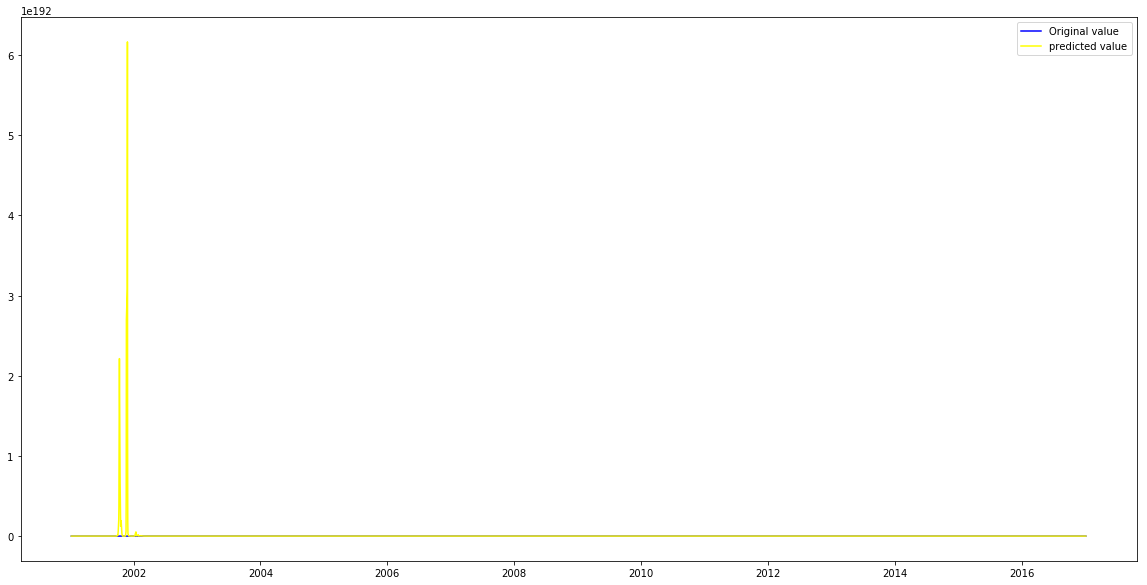

In [40]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dataset['WtdAvgPrice'].iloc[0], index=dataset.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize = (20,10))
plt.plot(dataset,color='blue',label='Original value')
plt.plot(predictions_ARIMA,color='yellow',label='predicted value')
plt.legend(loc='best')

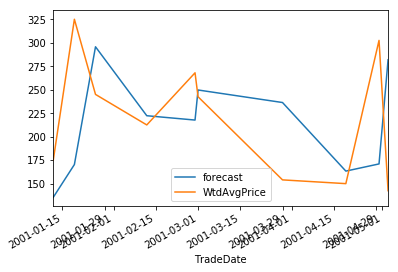

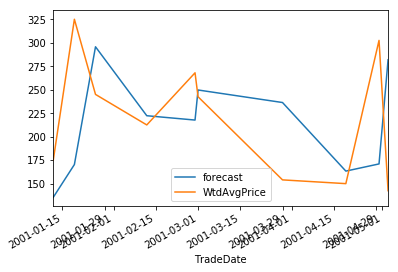

In [41]:
results.plot_predict(1,10)